In [1]:
#imports for keras
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_path = 'removed_hairs/train'
test_path = 'removed_hairs/test'
valid_path = 'removed_hairs/valid'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)

Found 774 images belonging to 3 classes.
Found 194 images belonging to 3 classes.
Found 242 images belonging to 3 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\ThePC\Anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


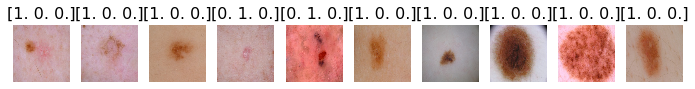

In [6]:
plots(imgs, titles=labels)

# BUILD AND TRAIN

In [7]:
cnn_model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)),
    Flatten(),
    Dense(3,activation='softmax')
])

In [8]:
cnn_model.compile(Adam(lr=.0001),loss='mean_squared_error', metrics=['accuracy'])

In [9]:
cnn_model.fit_generator(train_batches,steps_per_epoch=75,validation_data=valid_batches,validation_steps=25, epochs=5,verbose=1)

Epoch 1/5
75/75 [==============================] - 207s 3s/step - loss: 0.1978 - accuracy: 0.7030 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 2/5
75/75 [==============================] - 223s 3s/step - loss: 0.2142 - accuracy: 0.6801 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 3/5
75/75 [==============================] - 219s 3s/step - loss: 0.1955 - accuracy: 0.7083 - val_loss: 0.3333 - val_accuracy: 0.7397
Epoch 4/5
75/75 [==============================] - 222s 3s/step - loss: 0.2075 - accuracy: 0.6922 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 5/5
75/75 [==============================] - 229s 3s/step - loss: 0.1960 - accuracy: 0.7056 - val_loss: 0.3333 - val_accuracy: 0.7397


C:\Users\ThePC\Anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


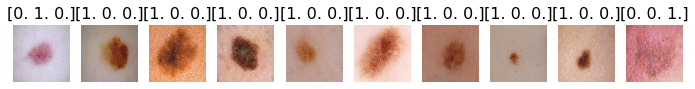

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [21]:
predictions = cnn_model.predict_generator(test_batches,steps=5,verbose=1)

20/20 [==============================] - 13s 636ms/step


In [22]:
predictions

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.000